In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [246]:
image = cv2.imread('teeth.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

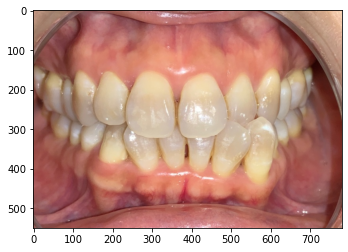

In [247]:
crop_image = image[50:600,120:900]
plt.imshow(crop_image)

In [39]:
g = cv2.cvtColor(crop_image,cv2.COLOR_RGB2GRAY)
#blurred = cv2.GaussianBlur(g, (3, 3), 0)

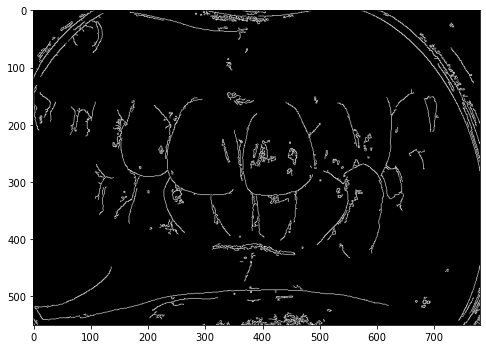

In [44]:
edge = cv2.Canny(g, 40, 180)
fig, ax = plt.subplots(1, figsize=(8,8))
plt.imshow(edge, cmap='gray')

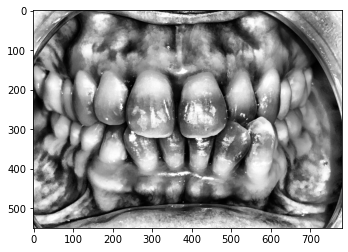

In [213]:
clahe = cv2.createCLAHE(clipLimit=14.0, tileGridSize=(8,8))
img = cv2.cvtColor(crop_image, cv2.COLOR_RGB2GRAY)
c = clahe.apply(img)
plt.imshow(c,cmap='gray')

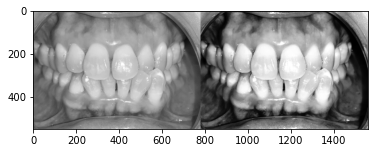

In [218]:
img = cv2.cvtColor(crop_image, cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
plt.imshow(res,cmap='gray')

In [219]:
img = cv2.medianBlur(equ,11)

ret,th1 = cv2.threshold(equ,127,255,cv2.THRESH_BINARY)
#th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(equ,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

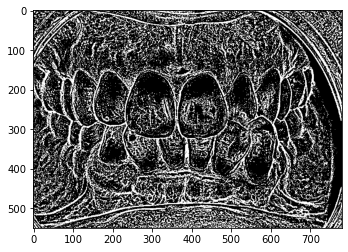

In [221]:
plt.imshow(th3,cmap='gray')

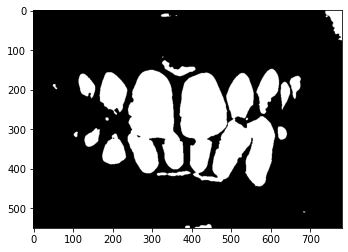

In [228]:
blurred = cv2.GaussianBlur(equ, (11, 11), 0)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh,cmap='gray')

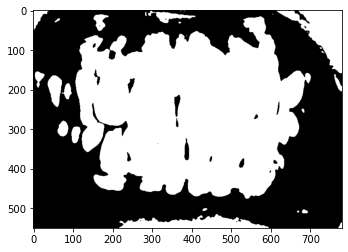

In [230]:
ret, otsu = cv2.threshold(blurred,200,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')

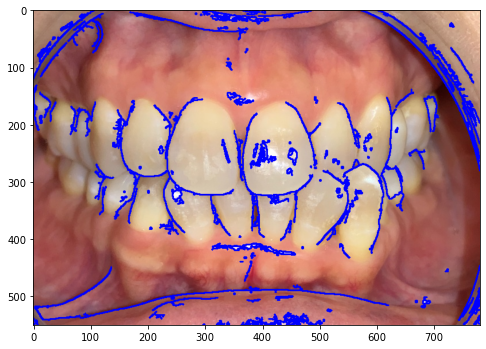

In [45]:
contours = cv2.findContours(edge, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(crop_image, contours[0], -1, (0,0,255), thickness = 2)
fig, ax = plt.subplots(1, figsize=(8,8))
plt.imshow(crop_image)

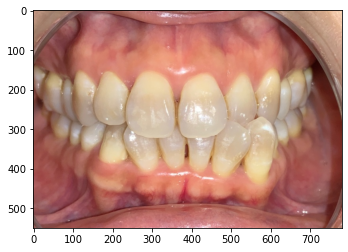

In [232]:
image = cv2.imread('teeth.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
crop_image = image[50:600,120:900]
plt.imshow(crop_image)

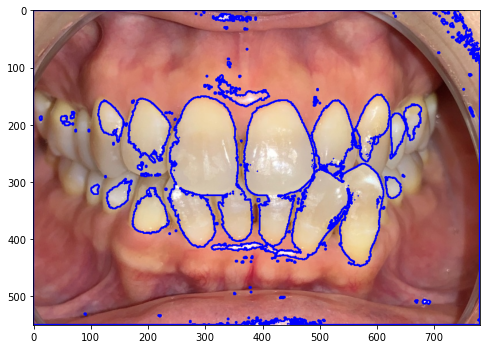

In [181]:
gray = cv2.cvtColor(crop_image, cv2.COLOR_RGB2GRAY)
r, t = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
contours, h = cv2.findContours(t, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#contours = sorted(contours, key=cv2.contourArea, reverse=True)
cv2.drawContours(crop_image, contours, -1, (0,0,255), thickness = 2)
fig, ax = plt.subplots(1, figsize=(8,8))
plt.imshow(crop_image)

In [161]:
img = cv2.cvtColor(crop_image, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,11)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

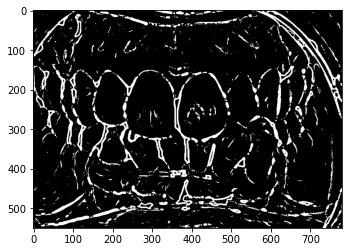

In [162]:
plt.imshow(th3,cmap = 'gray')

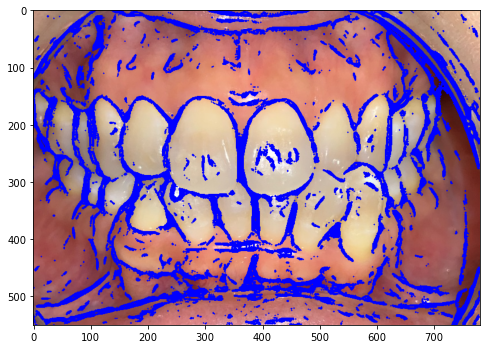

In [163]:
contours, h = cv2.findContours(th3, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#contours = sorted(contours, key=cv2.contourArea, reverse=True)
cv2.drawContours(crop_image, contours, -1, (0,0,255), thickness = 2)
fig, ax = plt.subplots(1, figsize=(8,8))
plt.imshow(crop_image)

In [242]:
!pip install pixellib

  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16037 sha256=6d1d4d037172d1a5d8ec714e7f02e46789572de4a0be0a975f822ae3e9f4b12b
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\da\7c\3e\296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
Successfully built imantics


In [248]:
cv2.imwrite("crop_image.png",crop_image)

True

In [249]:
import pixellib
from pixellib.semantic import semantic_segmentation

segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 
segment_image.segmentAsPascalvoc("teeth.png", output_image_name = "new_teeth.png")

Processed Image saved successfuly in your current working directory.


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,


In [250]:
import cv2

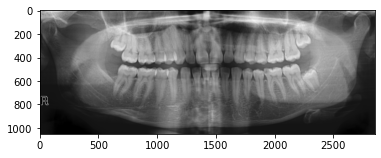

In [331]:
img = cv2.imread("6.png")
plt.imshow(img)

In [296]:
img.shape

(1050, 2850, 3)

In [281]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.imshow(dst,cmap = 'gray')

error: OpenCV(4.3.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


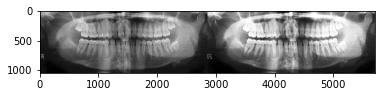

In [297]:
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(new_img)
res = np.hstack((new_img,equ))
plt.imshow(res,cmap='gray')

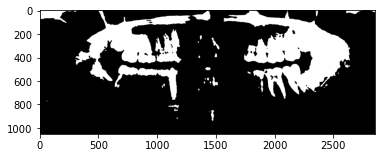

In [307]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(equ, 11)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap="gray")

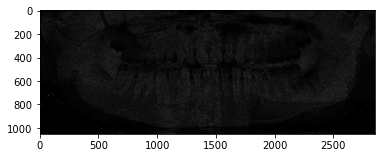

In [315]:
filterSize =(3, 3) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,  
                                   filterSize) 
  
# Reading the image named 'input.jpg' 
#input_image = cv2.imread("testing.jpg") 
#input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Applying the Top-Hat operation 
tophat_img = cv2.morphologyEx(equ,  
                              cv2.MORPH_TOPHAT, 
                              kernel)
plt.imshow(tophat_img,cmap='gray')

In [319]:

import cv2 
import numpy as np 
  
# Open the image. 
img = cv2.imread('6.png') 
  
# Trying 4 gamma values. 
for gamma in [0.1, 0.5,1.0, 1.2,1.8,2.0 ,2.2,2.6]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.png', gamma_corrected) 


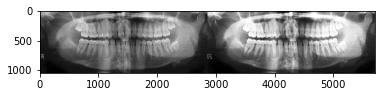

In [371]:
new_img = cv2.imread("6.png")
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(new_img)
res = np.hstack((new_img,equ))
plt.imshow(res,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


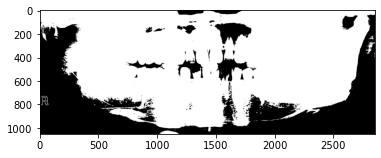

In [328]:
import numpy as np 
  
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
 
img = cv2.imread('6.png') 
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
# Save edited image. 
plt.imshow(contrast_stretched) 

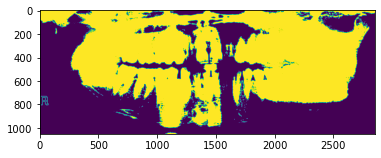

In [330]:
new_img = cv2.imread("6.png")
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold(new_img,0,255,cv2.THRESH_OTSU)
plt.imshow(th1)

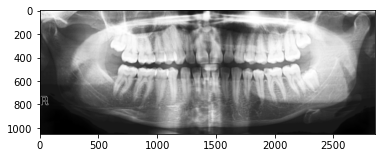

In [345]:
image = cv2.imread("6.png")
blur = cv2.bilateralFilter(equ,9,75,75)
plt.imshow(blur,cmap = 'gray')

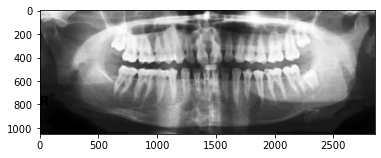

In [354]:
kernel = np.ones((11,11),np.uint8)
erosion = cv2.erode(blur,kernel,iterations = 1)
plt.imshow(erosion,cmap = 'gray')

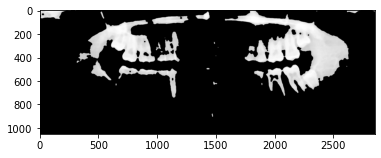

In [360]:
#gray = cv2.cvtColor(erosion, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(erosion, 11)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_TOZERO)[1]
plt.imshow(thresh, cmap="gray")

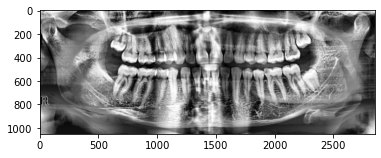

In [369]:
image = cv2.imread('6.png')
clahe = cv2.createCLAHE(clipLimit=16.0, tileGridSize=(10,10))
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
c = clahe.apply(img)
plt.imshow(c,cmap='gray')

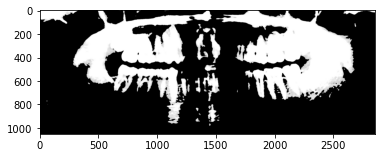

In [374]:
image = cv2.imread('contrast_stretch.png')
blurred = cv2.medianBlur(image, 11)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_TOZERO)[1]
plt.imshow(thresh, cmap="gray")

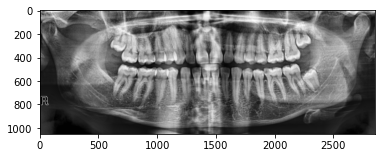

In [9]:
img = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
cl = clahe.apply(img)
plt.imshow(cl,cmap = 'gray')

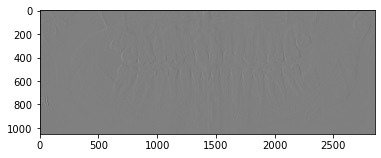

In [16]:
img = cv2.imread('6.png', cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3) 
laplacian = cv2.Laplacian(img,cv2.CV_64F) 
plt.imshow(sobelx,cmap = 'gray') 
#plt.imshow(sobely,cmap='gray') 
#plt.imshow(laplacian,cmap='gray')     

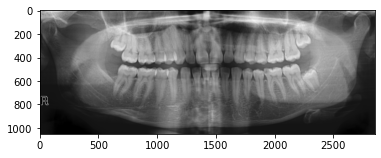

In [18]:
img = cv2.imread('6.png')
plt.imshow(img,cmap = 'gray')

In [19]:
img.shape

(1050, 2850, 3)

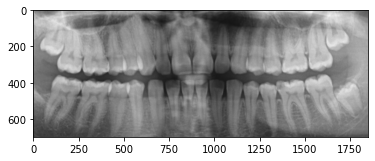

In [29]:
img = cv2.imread('6.png')
crop = img[100:800,560:2410]
plt.imshow(crop,cmap='gray')

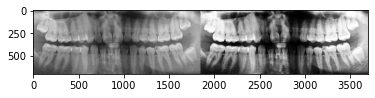

In [43]:
#new_img = cv2.imread("6.png")
new_img = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(new_img)
res = np.hstack((new_img,equ))
plt.imshow(res,cmap='gray')

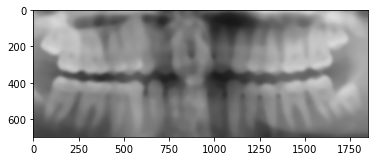

In [61]:

blur = cv2.medianBlur(crop,39)
blur = cv2.GaussianBlur(blur,(39,39),0)
blur = cv2.bilateralFilter(blur,9,80,80)

plt.imshow(blur,cmap = 'gray')

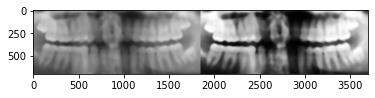

In [68]:
new_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(new_img)
res = np.hstack((new_img,equ))
plt.imshow(res,cmap='gray')

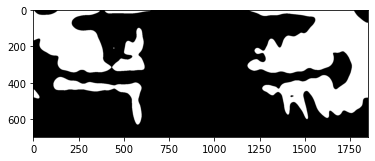

In [71]:
thresh = cv2.threshold(equ, 180, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap="gray")

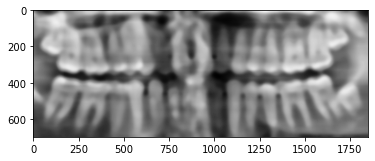

In [66]:
img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
cl = clahe.apply(img)
plt.imshow(cl,cmap = 'gray')

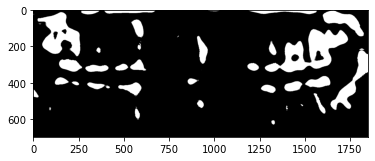

In [67]:
thresh = cv2.threshold(cl, 180, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap="gray")

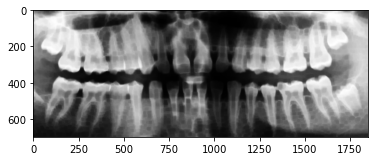

In [45]:
kernel = np.ones((11,11),np.uint8)
erosion = cv2.erode(blur,kernel,iterations = 1)
plt.imshow(erosion,cmap = 'gray')

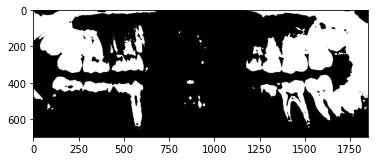

In [51]:
thresh = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap="gray")

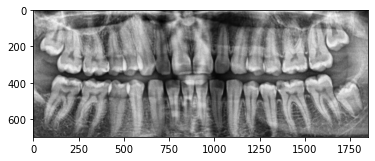

In [42]:
img = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
cl = clahe.apply(img)
plt.imshow(cl,cmap = 'gray')